## [Problem 1] Feature selection for practice
After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [31]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Extract the specified variables
selected_features = ['GrLivArea', 'YearBuilt', 'SalePrice']
selected_df = df[selected_features]

In [6]:
selected_df.head(10)

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
5,1362,1993,143000
6,1694,2004,307000
7,2090,1973,200000
8,1774,1931,129900
9,1077,1939,118000


In [7]:
selected_df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

## [Problem 2] Estimation and evaluation by linear regression

Easily analyze and pre-process your data, then create and run a series of Linear regression training, estimation, evaluation, and visualization.

sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation

For regression problems, it is common to use Mean Squared Error (MSE) as an index value for evaluation.

sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation

Visualization can be done by the features on the horizontal axis and the estimated house price on the vertical axis.

Use scatter to create a graph that allows you to compare the actual data with the predicted results.

In [9]:
# Extract the selected features
X = selected_df[['GrLivArea', 'YearBuilt']]
y = selected_df['SalePrice']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [13]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2495554898.6683216


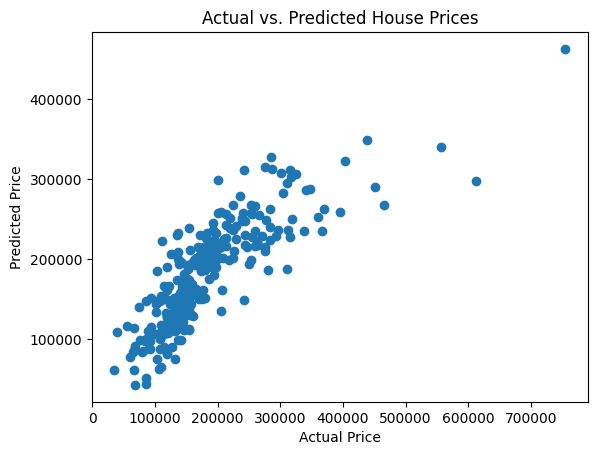

In [14]:

# Visualize the actual vs. predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()


From the above we can see that we got a large Mean Squared Error (MSE) value which indicates that the model's predictions are quite far from the actual values on average. 

And this can be due to several potential reasons for this:

1. Feature selection - The model might need more relevant features to make accurate predictions. Using only GrLivArea and YearBuilt might not capture all the important factors affecting house prices.

2. Data quality - From our scatter plotwe can see some outliers in the data affecting the model's performance.


## [Problem 3] Comparison of methods


In [16]:
# Dictionary to store results
results = {}

In [17]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
results['Linear Regression'] = mse_linear

In [18]:
# SVM
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm = svm_reg.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
results['SVM'] = mse_svm

In [19]:
# Decision Tree
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
results['Decision Tree'] = mse_tree

In [20]:
# Random Forest
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test, y_pred_forest)
results['Random Forest'] = mse_forest

In [22]:
# Create a table to summarize the results
results_table = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Squared Error'])
results_table

,Mean Squared Error
Linear Regression,2.495555e+09
SVM,7.844111e+09
Decision Tree,2.140132e+09
Random Forest,1.615095e+09


In [23]:
# Visualize the actual vs. predicted house prices for each method
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0, 0.5, 'Predicted Price')

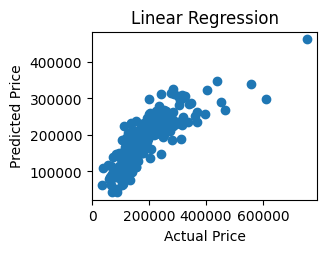

In [24]:
# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.title("Linear Regression")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

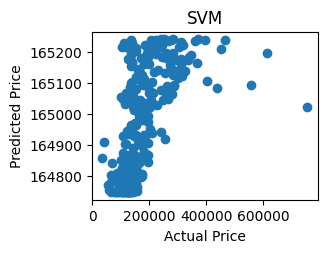

In [25]:
# SVM
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_svm)
plt.title("SVM")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

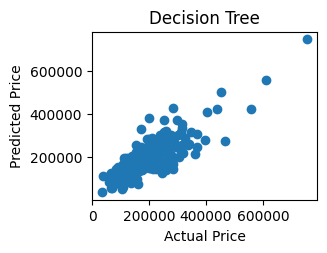

In [26]:
# Decision Tree
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_pred_tree)
plt.title("Decision Tree")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

Text(0, 0.5, 'Predicted Price')

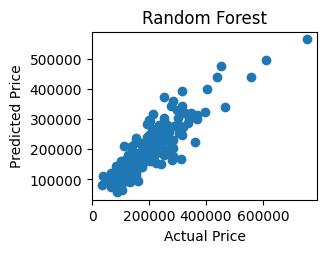

In [30]:
# Random Forest
plt.subplot(2, 2, 4)
plt.scatter(y_test, y_pred_forest)
plt.title("Random Forest")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")



Based on the Mean Squared Error (MSE) values obtained for each method:
 
The Random Forest method yielded the lowest MSE, indicating that it performed the best among the four methods for this particular dataset and feature set.

In the visualizations, the scatter plots comparing actual and predicted house prices for each algorithmn shows how closely the predicted prices align with the actual prices. For Random Forest, you can observe a tighter cluster of points around the diagonal line, indicating a better fit between predicted and actual prices compared to the other algorithmns.

## [Problem 4] (Advance assignment) Learning using other features

In [33]:
numerical_features = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

Number of Numerical features:  38
Number of Categorical features:  43


In [34]:
# Drop the 'Id' column as it does not provide meaningful information
df.drop(columns=['Id'], inplace=True)

# Handle categorical variables: one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [35]:

# Calculate correlation matrix
corr_matrix = df.corr()

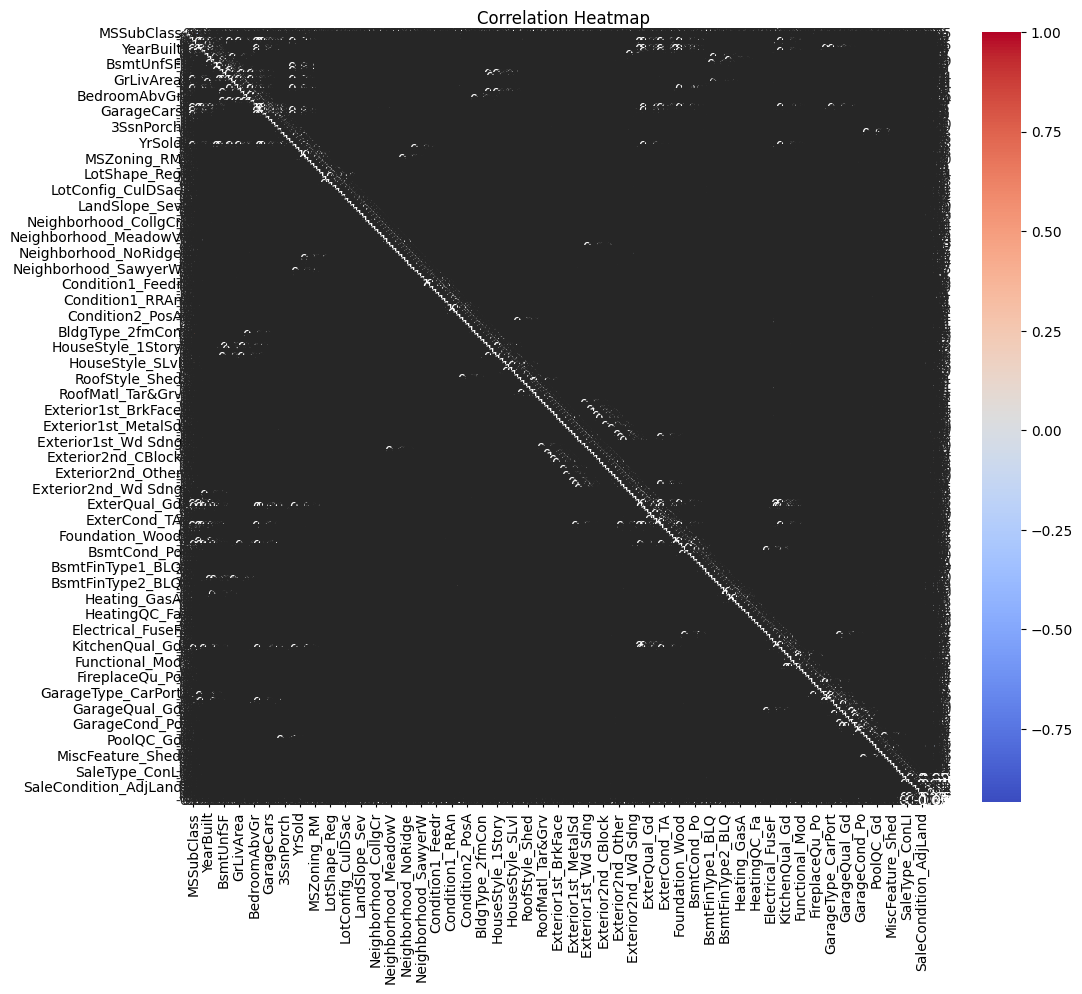

In [36]:
# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# Select features with correlation greater than a threshold (e.g., 0.5)
correlation_threshold = 0.5
correlated_features = corr_matrix['SalePrice'][abs(corr_matrix['SalePrice']) > correlation_threshold].index.tolist()
print("Correlated features:", correlated_features)

Correlated features: ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'ExterQual_TA', 'KitchenQual_TA']


In [39]:
df[correlated_features].head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,KitchenQual_TA
0,7,2003,2003,856,856,1710,2,8,2,548,208500,False,False
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,True,True
2,7,2001,2002,920,920,1786,2,6,2,608,223500,False,False
3,7,1915,1970,756,961,1717,1,7,3,642,140000,True,False
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,False,False


In [40]:
df[correlated_features].isnull().sum()

OverallQual       0
YearBuilt         0
YearRemodAdd      0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
TotRmsAbvGrd      0
GarageCars        0
GarageArea        0
SalePrice         0
ExterQual_TA      0
KitchenQual_TA    0
dtype: int64

In [41]:
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df[correlated_features]), columns=correlated_features)


In [42]:
# Model training and evaluation

X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['SalePrice'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.0118472112441263e-19


In [43]:
# Train SVR model
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

In [44]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

In [45]:
# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [46]:
# Create a bar graph to compare MSE values for different models
models = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest']
mse_values = [mse, mse_svr, mse_dt, mse_rf]

In [49]:
print(mse)
print(mse_svr)
print(mse_dt)
print(mse_rf)

1.0118472112441263e-19
7836308456.674721
4437065.921232876
21120672.41763325


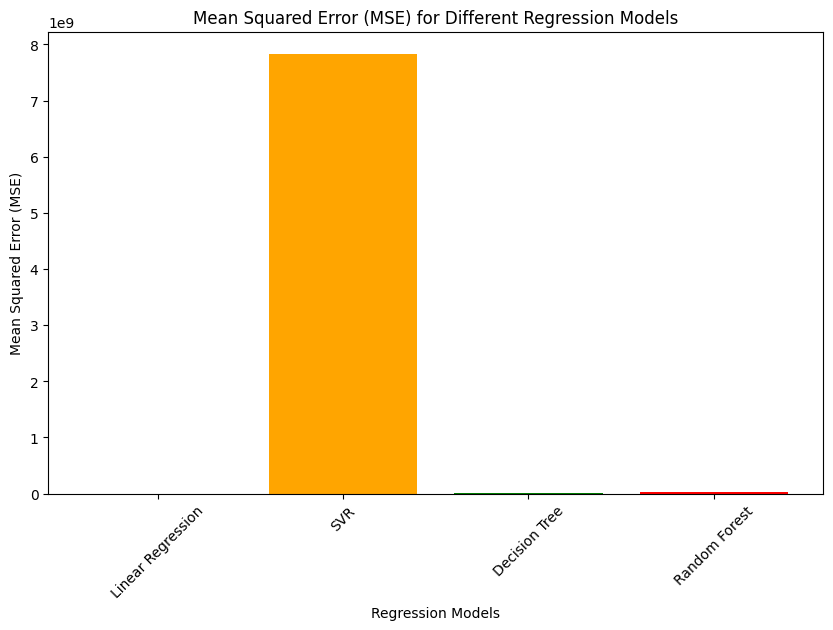

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Squared Error (MSE) for Different Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()


Linear regression outperforms the other models with an extremely low MSE, indicating a very good fit to the data.
While the SVR has a higher MSE compared to the other models, suggesting it may not be the best choice for this dataset.
